<h1>Fetal Health Assestment using Classification</h1>
<p>CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.</p>

In [2]:
from sklearn.model_selection import StratifiedKFold

<h3>Import libraries and Load Dataset 

In [3]:

# Importing Libraries
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')




In [4]:
# loading the dataset
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


<h3>Exploratory Data analysis</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

There are 21 columns with no missing values and all the datatypes are numerical.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


histogram_tendency column has discrete values of 0, 1 and -1 so we cannot use scaling. But we have dropped this column later on due to very low correlation. <br>
severe_decelerations has only two values 0 with 2119 value counts and 0.001 with 7 value counts.<br>
prolongued_decelerations has 6 discrete values with 0 being the most common with 1948 value counts. <br>
percentage_of_time_with_abnormal_long_term_variability is already a scaled column with values between 0 and 100. <br>

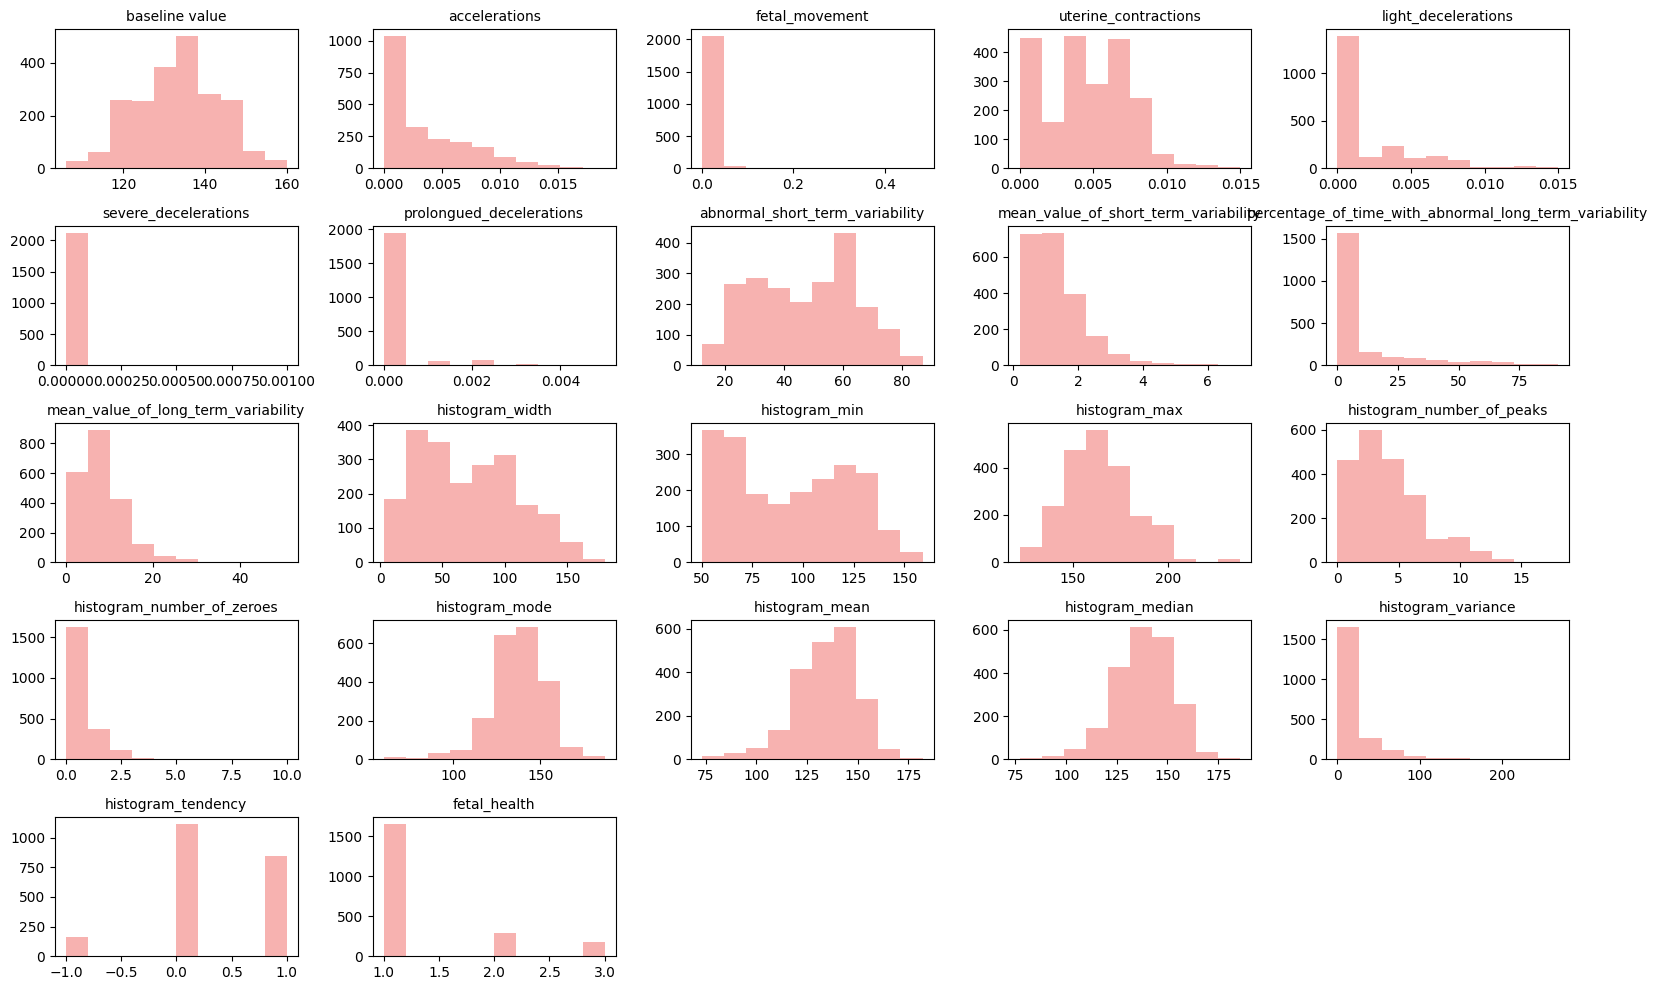

In [22]:
 # plotting distribution of all the columns using histplot
histplot=df.hist(figsize=(16,10), color='#f7b2b0')
for ax in histplot.flatten():
    ax.title.set_size(10)
    ax.grid(False)
plt.tight_layout()
plt.show()

we can see most of the plots are skewed and need to be treated. Some are more skewed than others. 

C:\Users\Shruti\AppData\Local\Temp\ipykernel_19636\4214851717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fetal_health', palette=colours)


Text(0, 0.5, 'Clases')

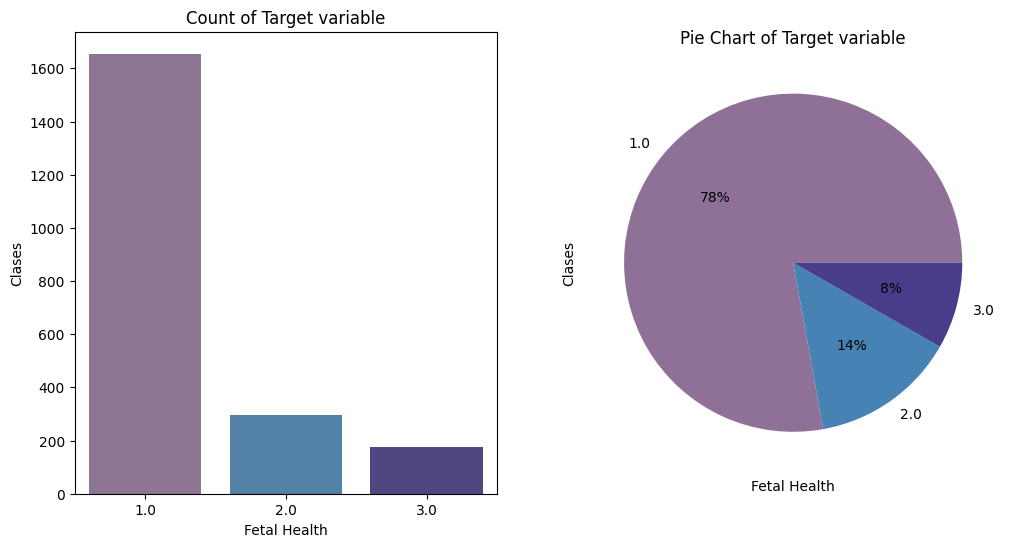

In [21]:
# visualising the target variable
colours=["#8f7198", "#4682B4", "#483D8B"]
plt.figure(figsize=(12, 6), clear=True)

plt.subplot(121)
sns.countplot(data=df, x='fetal_health', palette=colours)
plt.title("Count of Target variable")
plt.xlabel("Fetal Health")
plt.ylabel("Clases")

plt.subplot(122)
counts=df['fetal_health'].value_counts()
plt.pie(counts, labels=counts.index, colors=colours, autopct='%1.0f%%', )
plt.title("Pie Chart of Target variable")
plt.xlabel("Fetal Health")
plt.ylabel("Clases")

We see that our target variable is imbalanced therefore we cannot rely on accuracy. we will have to look at other metrics to evaluate our models

<Axes: >

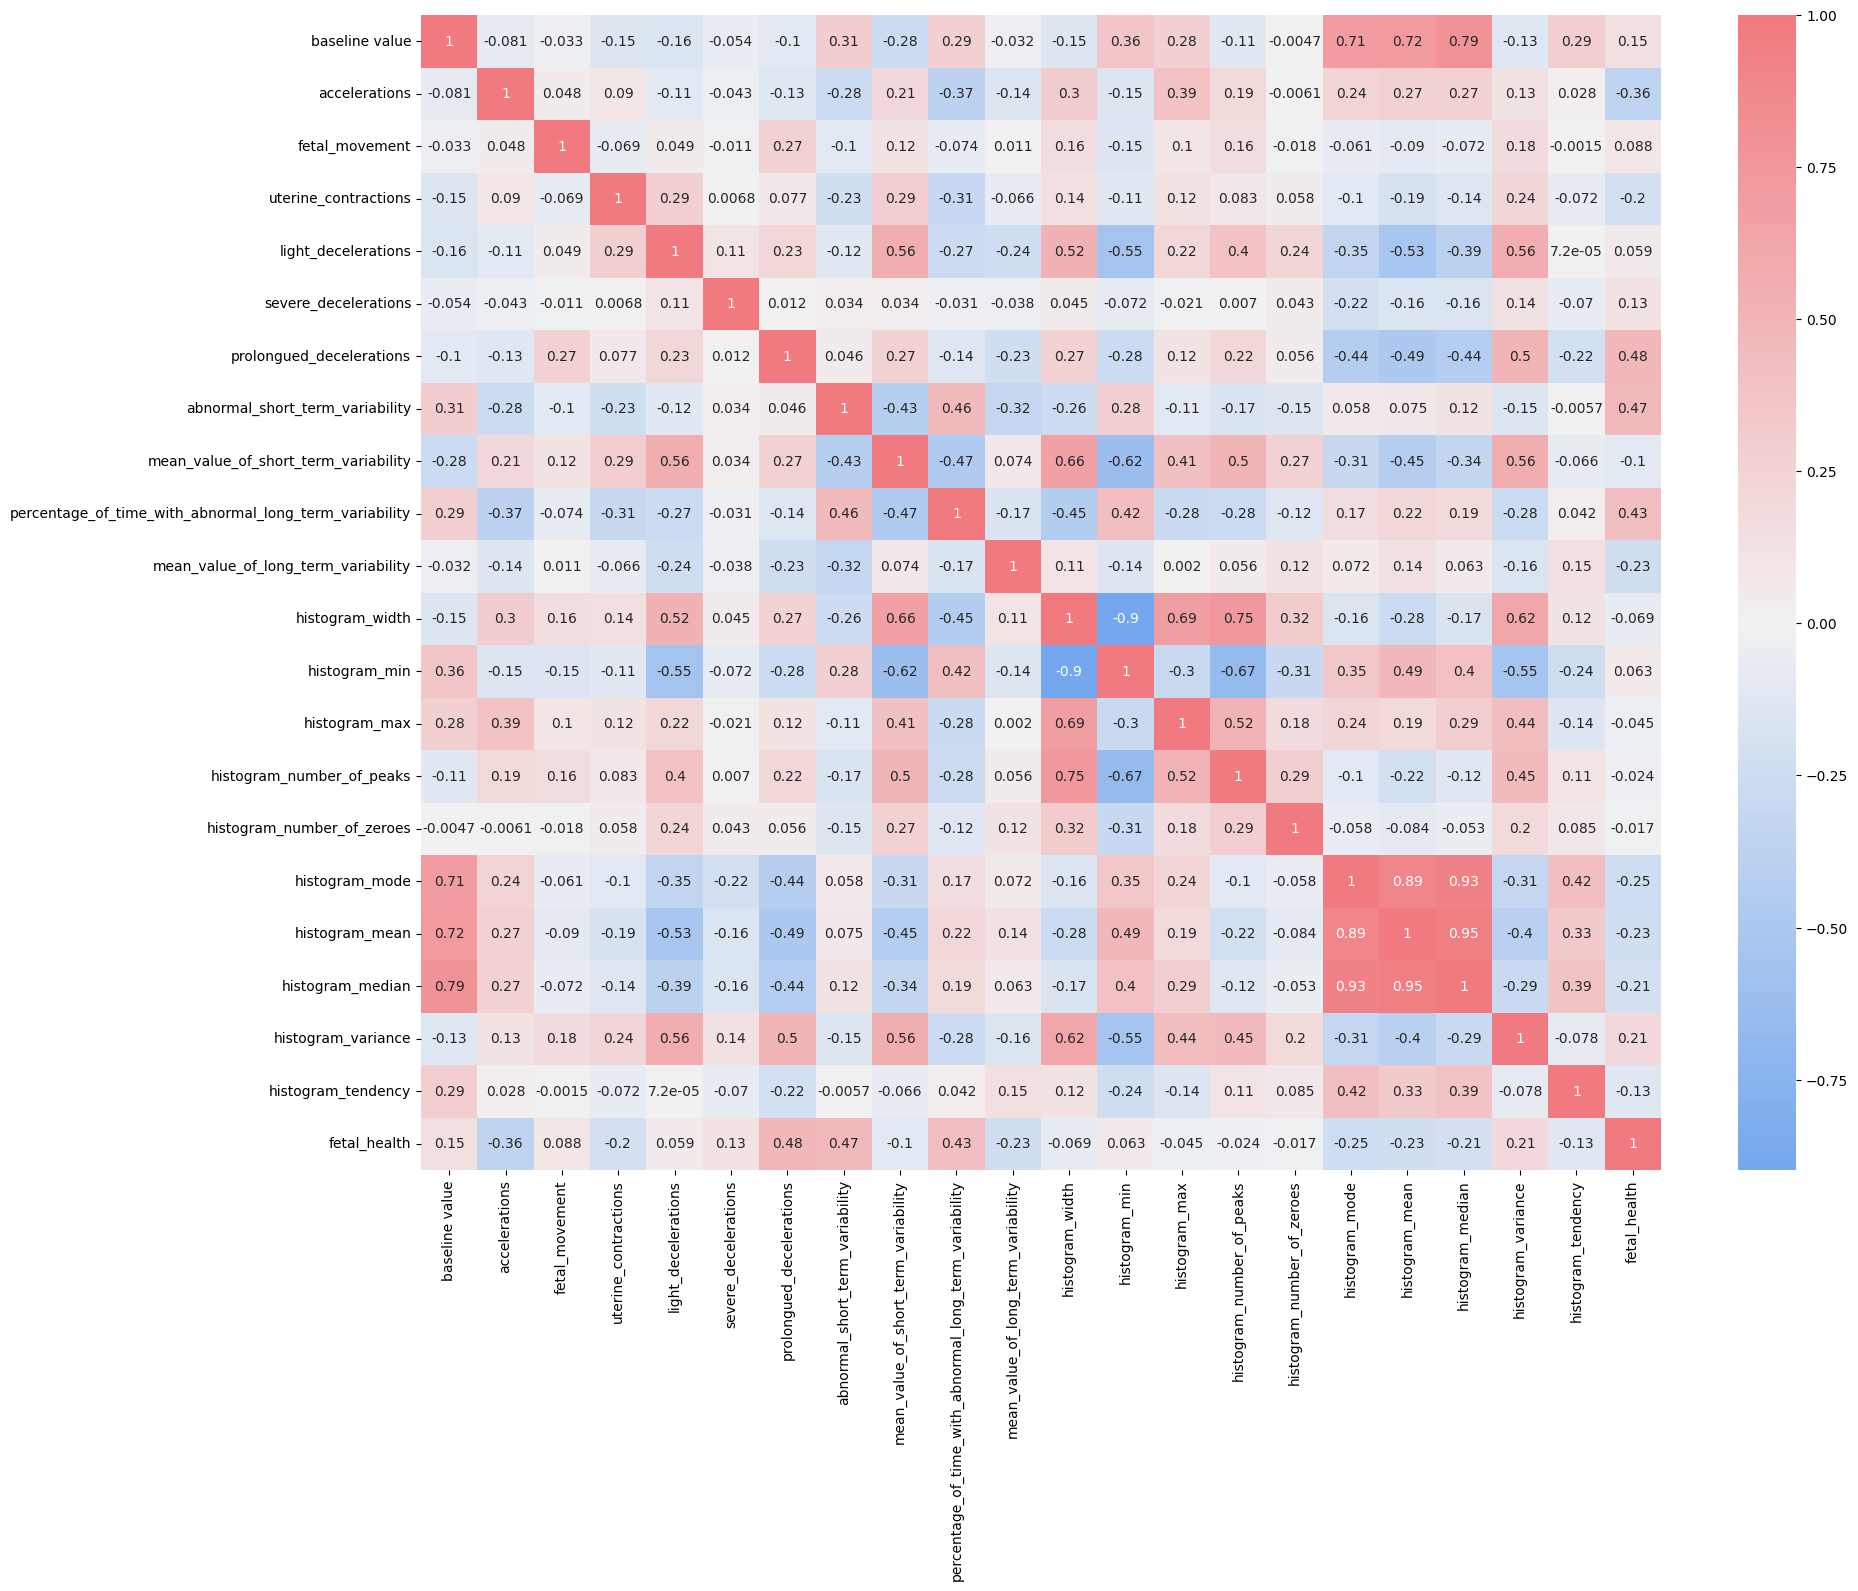

In [3]:
# Plotting a correlation matrix

corrmat=df.corr()
plt.figure(figsize=(20,15))

cmap = sns.diverging_palette(250, 10, s=80, l=65, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Features that show more than 85% correlation are: histogram_mean, histogram_mode, <br>
Features that show less than 10% correlation are: light_decelerations, histogram_number_of_zeroes, histogram_width, histogram_number_of_peaks, histogram_max<br>
We can see three features: "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target culumn (fetal_health).

<h3>Feature Selection </h3>

In [5]:
# dropping columns with less correlation
col_to_drop = [
    'light_decelerations', 
    'histogram_number_of_zeroes', 
    'histogram_tendency', 
    'severe_decelerations', 
    'prolongued_decelerations', 
    'histogram_number_of_peaks', 
    'histogram_max'
]

# Drop columns and create a new DataFrame
df_new = df.drop(columns=col_to_drop)


<h3>Splittng our data into training and test data and scaling our data</h3> 

In [6]:
# defining dependednt and independednt variables
x = df_new.drop(['fetal_health'], axis=1)
y=df_new['fetal_health']

In [7]:
# train and test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1488, 14), (638, 14), (1488,), (638,))

 
Handling class imbalance is crucial for building effective classification models. One popular technique to address this issue is SMOTE (Synthetic Minority Over-sampling Technique).  It selects two or more similar instances and creates new examples that lie along the line segments connecting them. SMOTE is particularly useful when the dataset is moderately imbalanced and you want to avoid overfitting that can occur with random oversampling. 

In [9]:
sampling_strategy = {1.0: 1160, 2.0: 483, 3.0: 483}

# SMOTE with custom sampling strategy and k_neighbors
smote = SMOTE(random_state=42, sampling_strategy=sampling_strategy, k_neighbors=10)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [10]:

y_train.value_counts()

fetal_health
1.0    1160
3.0     483
2.0     483
Name: count, dtype: int64

Standardizes features by removing the mean and scaling to unit variance.<br>
When the data has a Gaussian (normal) distribution. Algorithms like SVM, logistic regression, and linear regression often perform better with standardized data.<br>
In our dataset, outliers will not be removed as they are not result of error by an outcome of the CTG report itself. Therefore we have not used Robust Scaler.<br>
Algorithms like Decision Trees, Random Forests, and Gradient Boosted Trees do not require scaling because they are not sensitive to the variance in the data. <br>

In [11]:
# Scaling the data
col_names = list(x.columns)
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=col_names)



In [12]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293
mean_value_of_long_term_variability,2126.0,2.406354e-16,1.000235,-1.455081,-0.637583,-0.139975,0.464263,7.555172
histogram_width,2126.0,-3.007942e-17,1.000235,-1.731757,-0.858765,-0.075640,0.758838,2.812936
histogram_min,2126.0,-4.679021e-17,1.000235,-1.474609,-0.899376,-0.019608,0.893996,2.213648


<h3> Building the models</h3>
<body>We are using our input features to predict categorical labels using machine learning algorithms. This is a Supervised Learning model as we have output labels available to us.<br>
We will be training  the data using Logistic Regression, Decision Trees, Random Forests, Gradient boost, Support Vector Machines(SVM), K-nearest neighbours and finally Naive Bayes.


</body>

In [13]:
# Building pipeline for various classifers

lr_pipe=Pipeline([('log_classifier', LogisticRegression())])

dt_pipe=Pipeline([('dt_classifier', DecisionTreeClassifier())])

rf_pipe=Pipeline([('rf_classifier', RandomForestClassifier())])

gb_pipe=Pipeline([('gb_classifier', GradientBoostingClassifier())])

knn_pipe=Pipeline([('knn_classifier', KNeighborsClassifier())])

# Fitting the pipelines to our model

pipelines=[lr_pipe, dt_pipe, rf_pipe, gb_pipe, knn_pipe]
pipe_dict={0:'LogisticRegression', 1:'DecisionTree', 2:'RandomForest', 3:'GradientBoosting', 4:'KNN'}

for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [14]:
# Performing a 5 fold crossvalidation 

mean_cv_score=[]
for i,model in enumerate(pipelines):
    cv_score=cross_val_score(model, x_train, y_train, cv=5)
    mean_cv_score.append(cv_score)
    print("%s: %f" %(pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.818448
DecisionTree: 0.928990
RandomForest: 0.955799
GradientBoosting: 0.947803
KNN: 0.902178


WE see that Gradient Boosting and Random Forest have performed well. Least score we get from Logistic regression.

<h3> Hyperparameter tuning

GridSearchCV is an exhaustive search over a specified parameter grid for a model. It is used to find the optimal hyperparameters by evaluating every possible combination of hyperparameters within the specified grid. <br>
GridSearchCV is an exhaustive search over a specified parameter grid for a model. It is used to find the optimal hyperparameters by evaluating every possible combination of hyperparameters within the specified grid.<br>
Since our dataset and parameters are reasonable size we will use gridsearchcv for best outcome. <br>
Since our best performing models are RandomForest and Gradient Boost, lets see if we can improve their performance. Also e are using hyperparameter 'n_jobs=-1' which specifies the number of CPU cores used during training and prediction. The value -1 means that all available CPU cores are used. <br>
The grid search evaluates model performance using the macro-averaged F1 score to account for the imbalanced nature of the multiclass problem.


In [15]:
# Defining different hyperparameter grids

# Logistic Regression
logistic_grid = {
    'penalty': ['l2','l1'], # prevent overfitting
    "random_state": [42],
    "max_iter": [50,100,200],
    "multi_class":['multinomial','auto'] #multiclass dependent variable
    
}

# Decision Tree
tree_grid = {
    'criterion': ['gini', 'entropy'], # quality of a split.
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10], # min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest
rf_grid={
    'n_estimators':[100, 200, 300], # Number of trees in the forest.
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[None, 10, 20, 30], #controls overfitting
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting
gb_grid = {
    'n_estimators': [100, 200, 300], # Number of boosting stages 
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# K-Nearest Neighbors
knn_grid = {
    'n_neighbors': [3, 5, 7, 9], # we want decision boundary smooth or not 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


In [18]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=logistic_grid, cv=5, n_jobs=-1, scoring='f1_macro')
logistic_grid_search.fit(x_train, y_train)
best_logistic = logistic_grid_search.best_estimator_

In [19]:
# Decision Tree
tree_model = DecisionTreeClassifier()
tree_grid_search = GridSearchCV(estimator=tree_model, param_grid=tree_grid, cv=5, n_jobs=-1, scoring='f1_macro')
tree_grid_search.fit(x_train, y_train)
best_tree = tree_grid_search.best_estimator_

In [20]:
# Random Forest
rf_model = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_grid, cv=5, n_jobs=-1, scoring='f1_macro')
rf_grid_search.fit(x_train, y_train)
best_rf = rf_grid_search.best_estimator_

In [23]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_grid, cv=5, n_jobs=-1, scoring='f1_macro')
gb_grid_search.fit(x_train, y_train)
best_gb = gb_grid_search.best_estimator_

In [24]:

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_grid, cv=5, n_jobs=-1, scoring='f1_macro')
knn_grid_search.fit(x_train, y_train)
best_knn = knn_grid_search.best_estimator_


In [26]:
models = {
    'Logistic Regression': best_logistic,
    'Decision Tree': best_tree,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'K-Nearest Neighbors': best_knn
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"Performance of {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


Performance of Logistic Regression:
Accuracy: 0.8433
Precision: 0.6982
F1 Score: 0.7344
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.89      0.91       496
         2.0       0.58      0.61      0.60       101
         3.0       0.57      0.88      0.69        41

    accuracy                           0.84       638
   macro avg       0.70      0.79      0.73       638
weighted avg       0.86      0.84      0.85       638

Confusion Matrix:
[[440  40  16]
 [ 28  62  11]
 [  1   4  36]]

Performance of Decision Tree:
Accuracy: 0.9060
Precision: 0.8165
F1 Score: 0.8406
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.93      0.95       496
         2.0       0.74      0.77      0.75       101
         3.0       0.76      0.90      0.82        41

    accuracy                           0.91       638
   macro avg       0.82      0.87      0.84       638
weighted avg

<h3> Visualize Performance of our model


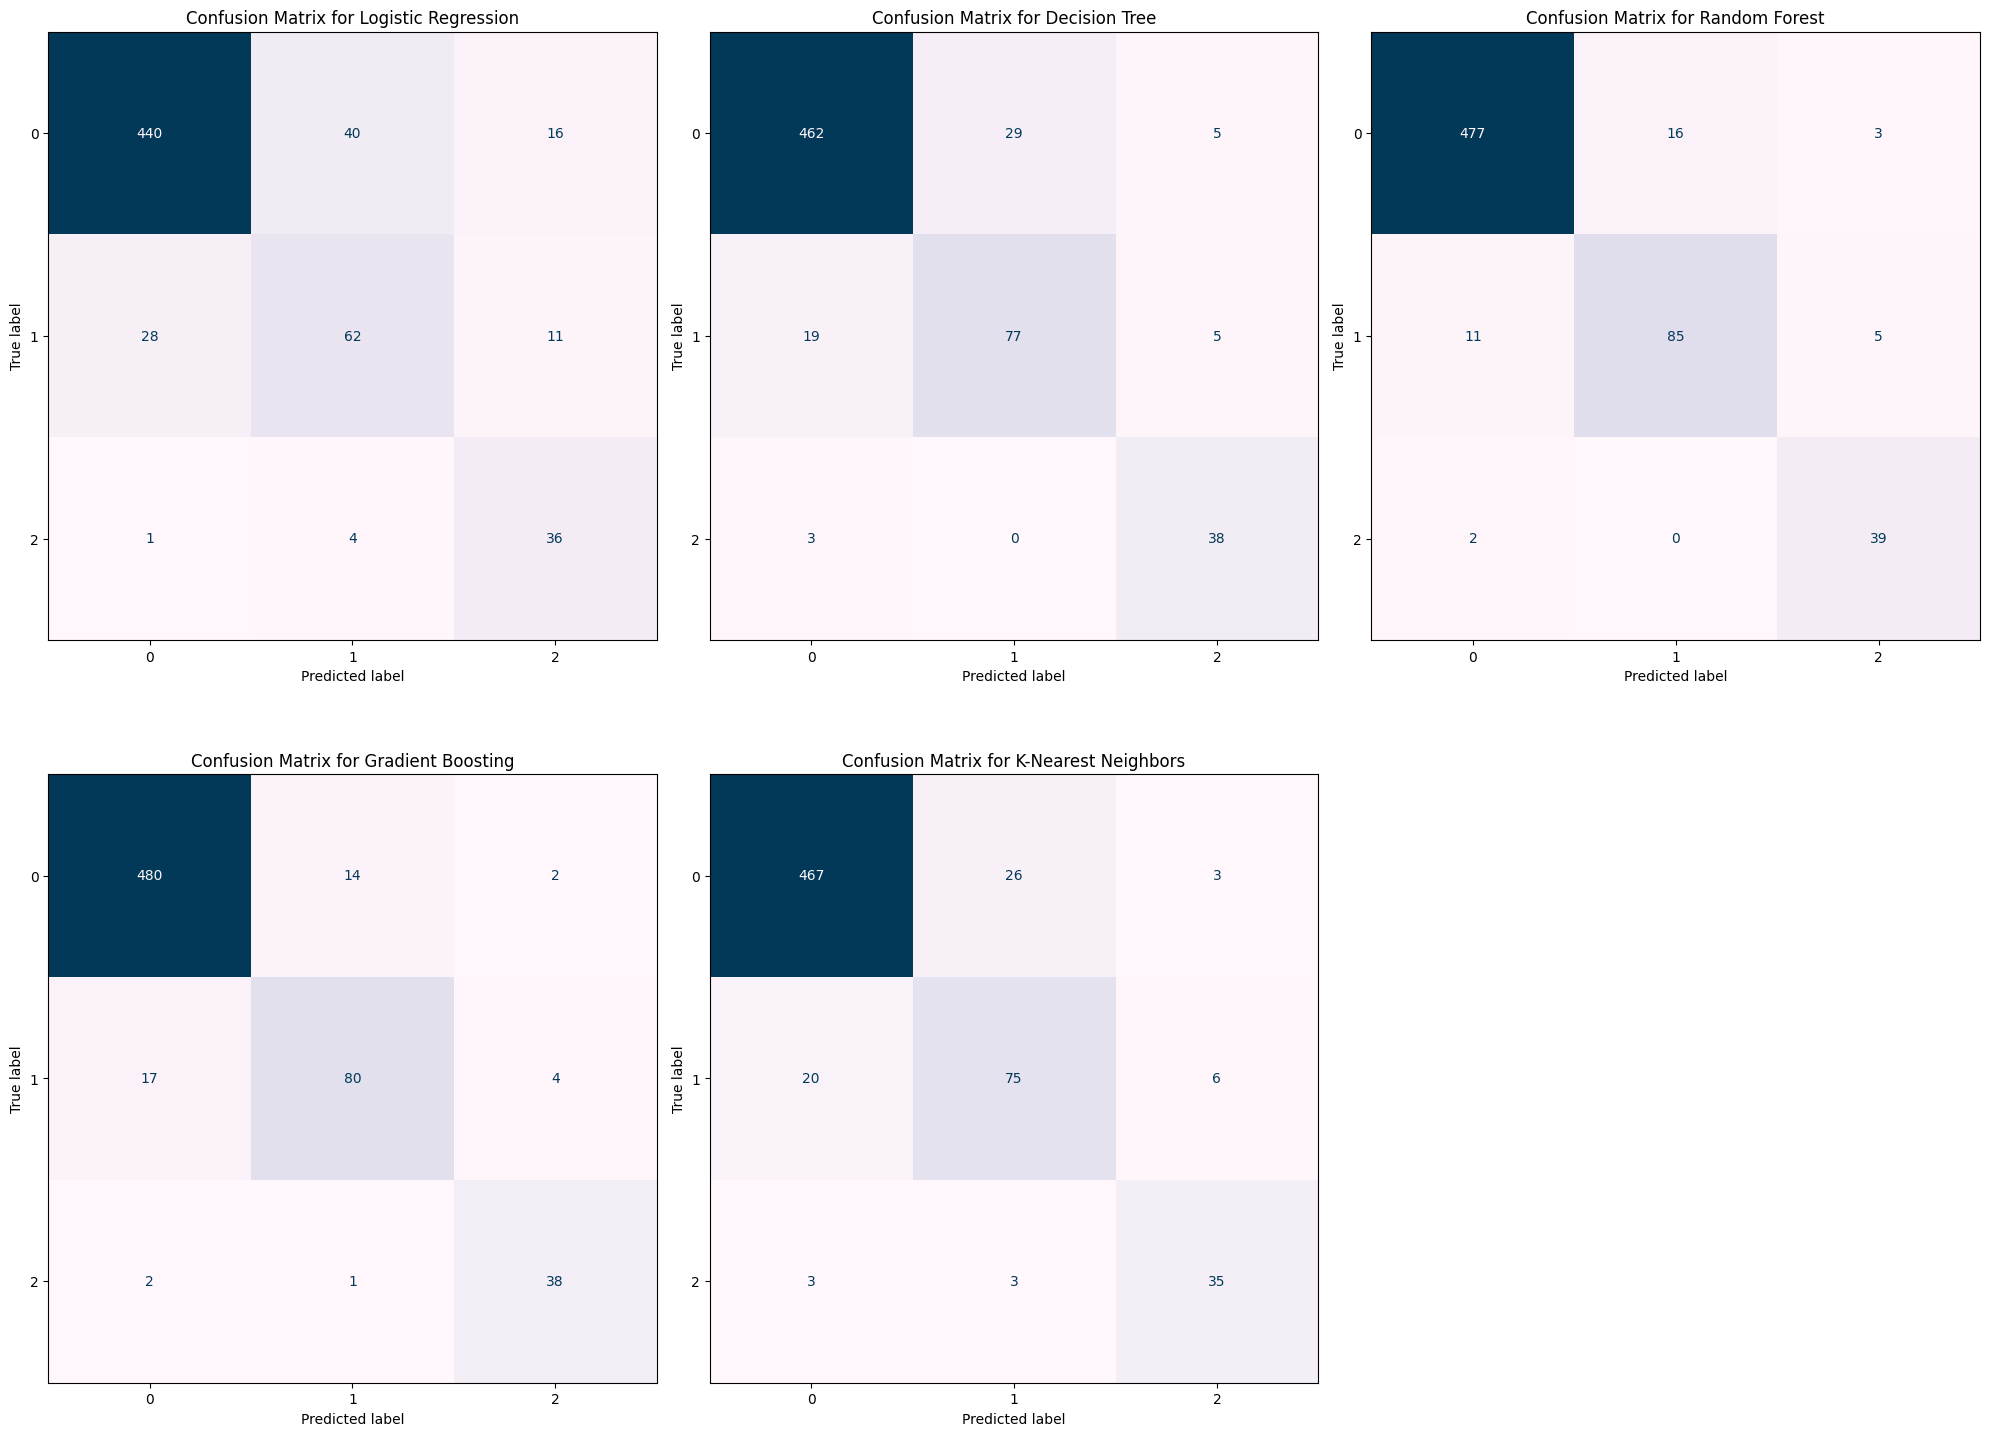

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(20, 15))
ax = ax.ravel()

num_models = len(models)

for i, (name, model) in enumerate(models.items()):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax[i], cmap='PuBu', colorbar=False)
    ax[i].set_title(f'Confusion Matrix for {name}')

# Remove any unused subplots
for j in range(num_models, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


Overall analysis:

- Gradient Boosting (0.9420) and Random Forest (0.9389) have the highest accuracy, followed closely by Decision Tree (0.9060) and K-Nearest Neighbors (0.9044). Logistic Regression (0.8433) has the lowest accuracy.
- Gradient Boosting and Random Forest also excel in precision and F1 score, indicating they handle the class imbalances better than the other models.
- Logistic Regression has the lowest precision and F1 scores, particularly struggling with the "Suspect" (2.0) and "Pathological" (3.0) classes.
- For the "Normal" class (1.0), all models perform exceptionally well in terms of precision, recall, and F1 score.

<h1> ThankYou